In [1]:
import numpy as np
from random import randint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_X = []
train_y = []

Example data:
    - An experimental drug was tested on individuals from age 13 to 100 in a clinical trial.
    - The trial had 2100 participants. Half were under 65 years of age and half were 65 years or older.
    - Around 95% of patients 65 or older experienced side effects.
    - Around 95% of patients under 65 experienced no side effects.

Half of the participants were below 65
    - i.e 13-64 age group must have 1050 samples
Similary for individuals above 65.
    -i.e 65-100 age group must have 1050 samples

Now out of 1050 from 65-100 age group, 
    -95% had side effects i.e ~1000 samples had side effects
    -5% had no side effects i.e ~50 samples had no side effects

Now out of 1050 from 13-64 age group,
    -5% had side effects i.e ~50 samples had side effects
    -95% had no side effects i.e ~1000 samples had no side effects

The above is the scenario, with the help of which we will create our custom dataset.

In [3]:
for i in range(50):
    # the 5% of younger individuals who had side effects
    random_young = randint(13,64)
    train_X.append(random_young)
    train_y.append(1)

    # the 5% of older individuals who had no side effects
    random_old = randint(65,100)
    train_X.append(random_old)
    train_y.append(0)

for i in range(1000):
     # the 95% of younger individuals who had no side effects
    random_young = randint(13,64)
    train_X.append(random_young)
    train_y.append(0)

    # the 5% of older individuals who had side effects
    random_old = randint(65,100)
    train_X.append(random_old)
    train_y.append(1)

In [4]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [5]:
train_X, train_y = shuffle(train_X, train_y)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
train_X_scaled = scaler.fit_transform(train_X.reshape(-1,1))

In [7]:
model = Sequential([
    Dense(units=16, input_shape=(1,) ,activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.fit(train_X_scaled, train_y, validation_split=0.1, epochs=100)

Epoch 1/100
60/60 [==============================] - 2s 10ms/step - loss: 0.7249 - accuracy: 0.4841 - val_loss: 0.7112 - val_accuracy: 0.5190
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.7104 - accuracy: 0.4556 - val_loss: 0.7010 - val_accuracy: 0.5476
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5238 - val_loss: 0.6896 - val_accuracy: 0.7810
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.7614 - val_loss: 0.6777 - val_accuracy: 0.6714
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.7196 - val_loss: 0.6670 - val_accuracy: 0.6524
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.7206 - val_loss: 0.6564 - val_accuracy: 0.6524
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.6447 - accuracy: 0.7233 - val_loss: 0.6461 - val_accuracy: 0.6524
Epoch 8/100


In [11]:
test_X = []
test_y = []

for i in range(10):
    # the 5% of younger individuals who had side effects
    random_young = randint(13,64)
    test_X.append(random_young)
    test_y.append(1)

    # the 5% of older individuals who had no side effects
    random_old = randint(65,100)
    test_X.append(random_old)
    test_y.append(0)

for i in range(200):
     # the 95% of younger individuals who had no side effects
    random_young = randint(13,64)
    test_X.append(random_young)
    test_y.append(0)

    # the 5% of older individuals who had side effects
    random_old = randint(65,100)
    test_X.append(random_old)
    test_y.append(1)


test_X = np.array(test_X)
test_y = np.array(test_y)
test_X, test_y = shuffle(test_X, test_y)

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
test_X_scaled = scaler.fit_transform(test_X.reshape(-1,1))

In [23]:
y_preds = model.predict(test_X_scaled)

14/14 [==============================] - 0s 2ms/step


In [24]:
y_preds = np.argmax(y_preds, axis=-1)
y_preds

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [25]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_true=test_y, y_pred=y_preds)
cm

array([[198,  12],
       [ 10, 200]], dtype=int64)

In [30]:
def plot_cm(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("confusion matrix without normalized")
    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel("True label")
    plt.ylabel("predicted label")

confusion matrix without normalized
[[198  12]
 [ 10 200]]


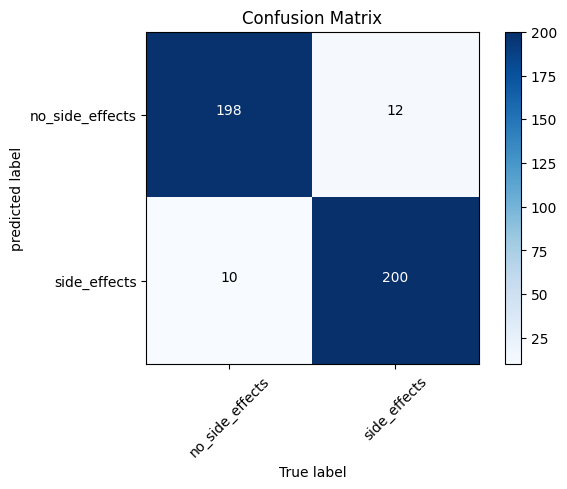

In [31]:
cm_plot_labels = ["no_side_effects", "side_effects"]
plot_cm(cm, cm_plot_labels)